In [243]:
from brian2 import *
%matplotlib inline

# fn's defining the gradients given a certain tuple of values
def get_delta_v(vt, ut, I):
    return 0.04*vt**2+5.*vt+140.-ut+I

def get_delta_u(a, b, vt, ut):
    return a*(b*vt - ut)

In [250]:
def generate_plot_and_print_spike_num_for_b_value(b):
    # init. values
    v = -65; u = 0;
    # constants
    a = 0.02;
    c = -65; d = 8;
    # time-step used in numerical integration
    dt = 0.005;
    
    v_vals = []; u_vals = []; timesteps = []
    n_steps = 100000
    spike_count = 0
    for i in range(0, n_steps):
        dv = get_delta_v(v, u, 0)
        du = get_delta_u(a, b, v, u)
        v += dv * dt
        u += du * dt
        if(v>=30):
            spike_count += 1
            v = c
            u = u + d
        v_vals += [v]
        u_vals += [u]
        timesteps += [i*dt]


    # plotting
    tot_time = n_steps * dt
    n_bins = 10
    axline_step = tot_time / n_bins
    figure(figsize=(11, 6))
    for l in range(n_bins+1):
        axvline(l*axline_step, ls='--', c='k')
    axhline(30, ls='-', c='lightgray', lw=3)
    plot(timesteps, v_vals, '-', label='v')
    plot(timesteps, u_vals, '-', label='u')
    xlabel('Time (s)')
    ylabel('v (mV)')
    title('Plot for constant parametrisation, with b='+str(b));

    print("last v:", v)
    print("last u:", u)
    print("spike_count: ", spike_count)
    return spike_count

current b-value: 0.25
last v: -64.4139110927039
last u: -16.103477773167544
spike_count:  0
current b-value: 0.26
last v: -62.505655314034904
last u: -16.252312730676646
spike_count:  0
current b-value: 0.27
last v: -67.331648201061
last u: -15.45880748481249
spike_count:  4
current b-value: 0.28
last v: -68.18970036600729
last u: -15.130128340331762
spike_count:  5


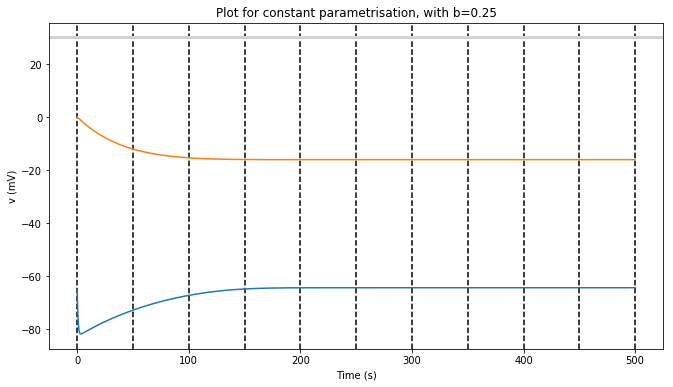

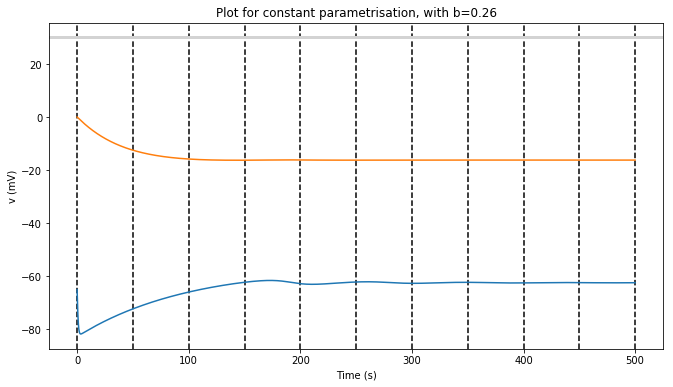

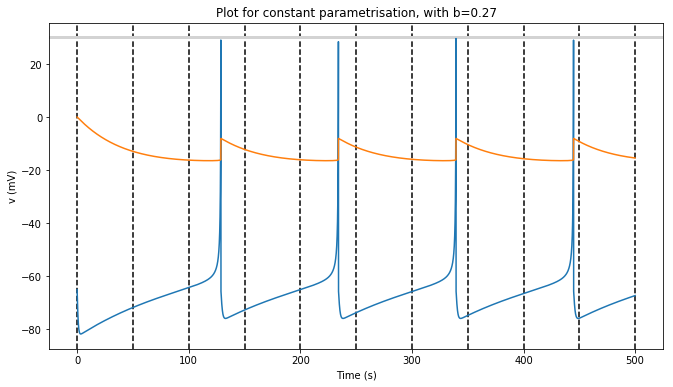

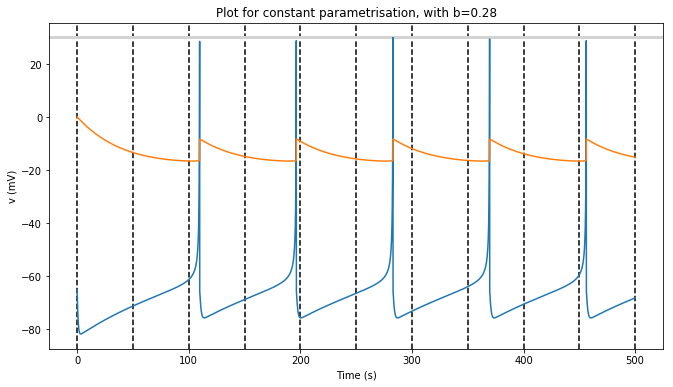

In [251]:
# b = 0.26063438251898  # found by binary search - bifurcation point for single node, without input current

spike_counts = []
b = 0.25
delta_b = 0.01
for t in range(0, 4):
    print("current b-value:", b)
    spike_counts += [generate_plot_and_print_spike_num_for_b_value(b)]
    b += delta_b

In [228]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
